# **Bike Sharing**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Bike sharing adalah sebuah layanan yang menyediakan sepeda untuk disewa secara sementara oleh pengguna, biasanya dalam waktu yang singkat, seperti beberapa jam atau hari. Layanan ini bertujuan untuk memberikan alternatif transportasi yang ramah lingkungan, efisien, dan terjangkau bagi masyarakat.

Perusahaan bike sharing menghadapi tantangan untuk memenuhi permintaan pengguna yang dinamis di berbagai waktu. Pengguna sering kali kesulitan menemukan sepeda yang tersedia. Masalah ini dapat menyebabkan ketidakpuasan pelanggan dan inefisiensi operasional, seperti biaya logistik yang tinggi untuk meredistribusi sepeda. Mengelola ketersediaan sepeda dengan lebih akurat berdasarkan permintaan dapat membantu meningkatkan efisiensi dan pengalaman pelanggan.

**Problem Statement**

Perusahaan perlu memprediksi jumlah pengguna sepeda pada waktu tertentu untuk mengoptimalkan penyediaan sepeda dan meningkatkan tingkat ketersediaan yang sesuai dengan kebutuhan. Gagalnya prediksi permintaan yang tepat dapat menyebabkan ketidakpuasan pelanggan karena kurangnya sepeda yang tersedia atau sebaliknya, terlalu banyak sepeda yang tidak digunakan.

**Goals**

- Primary Goal: Memprediksi jumlah penyewaan sepeda pada waktu yang berbeda dengan akurasi tinggi, sehingga perusahaan dapat mendistribusikan sepeda dengan lebih efisien.
- Secondary Goal: Mengurangi biaya operasional yang terkait dengan redistribusi sepeda dan meningkatkan kepuasan pelanggan dengan memastikan ketersediaan sepeda sesuai permintaan.

**Analytic Approach**

Untuk mencapai tujuan tersebut, pendekatan analitis berbasis machine learning akan digunakan:
- Data Collection & Preprocessing: Mengumpulkan data historis penyewaan sepeda, termasuk informasi waktu, data cuaca, dan variabel lain yang relevan; Membersihkan data dari anomali atau nilai yang hilang serta melakukan feature engineering seperti pengelompokan waktu.
- Model Selection: Menggunakan **model prediksi regresi** untuk memprediksi jumlah penyewaan sepeda.
- Training & Testing: Melatih model untuk menguji performa dan mencegah overfitting; Hyperparameter Tuning dilakukan untuk memilih model terbaik yang mampu menghasilkan prediksi paling akurat.

**Metric Evaluation**

Untuk mengevaluasi keberhasilan model prediksi, beberapa metrik evaluasi dapat digunakan, antara lain:
- Root Mean Squared Error (RMSE): Akar dari MSE, metrik ini memberikan pandangan lebih intuitif tentang kesalahan prediksi dalam skala asli data.
- Mean Absolute Error (MAE): Mengukur rata-rata perbedaan absolut antara nilai sebenarnya dengan nilai prediksi. Metrik ini memberikan gambaran seberapa besar rata-rata kesalahan prediksi tanpa memedulikan arah (underestimate atau overestimate).
- Mean Absolute Percentage Error (MAPE): Rataan persentase error yang dihasilkan oleh model regresi.

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah penyewaan sepeda sesuai dengan limitasi fitur yang digunakan. 

### **Data Understanding**

- Dataset merupakan data penyewaan sepeda pada tahun 2011 dan 2012.
- Setiap baris data merepresentasikan informasi penyewaan sepeda per hari.
- Dataset memiliki 11 kolom yang menginformasikan waktu penyewaan, kondisi lingkungan, dan banyaknya sepeda yang disewa.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity. The values are divided into 100 (max). |
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | Holiday (1) or not (0). |
| season | Integer | 1: winter, 2: spring, 3: summer, 4: fall |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale). |
| temp | Float | Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 |
| hr | Integer | Hour (0 to 23). |
| casual | Integer | Count of casual users. |
| registered | Integer | Count of registered users. |
| cnt | Integer | Count of total rental bikes, including both casual and registered. |

**Impor library yang dibutuhkan untuk eksplorasi dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [35]:
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### **Data Preprocessing**

**Pada tahap ini akan dilakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan digunakan untuk proses analisis selanjutnya**

**Periksa tipe data dari setiap kolom yang terdapat di dalam DataFrame df**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


Jika diperhatikan, jumlah data pada df telah lengkap atau dengan kata lain **tidak ada missing value** di dalamnya. Akan tetapi, terdapat **kesalahan tipe data untuk kolom 'dteday'**, dimana kolom tersebut harusnya direpresentasikan sebagai tipe data **datetime**, bukan **object**.

**Pemeriksaan duplikasi data dan ringkasan parameter statistik dari kolom numerikal pada DataFrame df**

In [37]:
print('Jumlah duplikasi:', df.duplicated().sum())
df.describe()

Jumlah duplikasi: 0


,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,1.416934,0.029758,2.488615,0.476996,0.498185,11.519770,35.834443,153.436580,189.271023
std,0.192102,0.635937,0.169925,1.106157,0.171857,0.192492,6.931872,49.489286,151.046123,181.223903
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,0.470000,1.000000,0.000000,2.000000,0.333300,0.340000,6.000000,4.000000,34.000000,40.000000
50%,0.620000,1.000000,0.000000,2.000000,0.484800,0.500000,12.000000,17.000000,115.000000,142.000000
75%,0.780000,2.000000,0.000000,3.000000,0.621200,0.660000,18.000000,49.000000,220.000000,282.000000
max,1.000000,4.000000,1.000000,4.000000,1.000000,1.000000,23.000000,362.000000,876.000000,970.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada df. 

**Ubah tipe data dari kolom 'dteday' menjadi 'datetime'**

In [38]:
df['dteday'] = pd.to_datetime(df['dteday'])
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


Jika diperhatikan, kolom **'dteday'** telah direpresentasikan sebagai tipe data **datetime**.

**Dari dokumentasi dataset yang disertakan, beberapa kolom sebenarnya dapat diubah menjadi tipe kategorikal, seperti kolom 'weathersit', 'holiday', dan 'season'**

In [39]:
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'})
df['holiday'] = df['holiday'].map({0: 'No', 1: 'Yes'})
df['season'] = df['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

df['weathersit'] = df.weathersit.astype('category')
df['holiday'] = df.holiday.astype('category')
df['season'] = df.season.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  category      
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  category      
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(4)
memory usage: 796.6 KB


Jika diperhatikan, pada DataFrame df akan terdapat **4 kolom dengan tipe data int**, **1 kolom dengan tipe data datetime**, **3 kolom dengan tipe kategorikal**, dan **3 kolom dengan tipe data float**.

Untuk memastikan data di DataFrame df telah berubah, tampilkan 10 data pertama dari DataFrame df.

In [40]:
df.head(10)

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,Clear,No,Fall,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,Clear,No,Spring,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,Clear,No,Spring,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,Mist/Cloudy,No,Spring,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,Clear,No,Summer,0.6970,0.76,18,99,758,857
5,2012-10-01,0.72,Clear,No,Fall,0.4545,0.46,0,6,39,45
6,2012-08-28,0.54,Clear,No,Summer,0.6515,0.70,22,20,196,216
7,2012-01-01,0.93,Clear,No,Winter,0.2727,0.26,9,13,27,40
8,2011-10-13,1.00,Mist/Cloudy,No,Fall,0.5152,0.54,4,2,5,7
9,2012-06-09,0.24,Clear,No,Spring,0.6970,0.82,16,219,315,534


#### **Exploratory Data Analysis**

**Distribusi total penyewa per musim yang dirincikan juga berdasarkan penyewa casual dan registered**

In [41]:
df.groupby(by = 'season', observed = False).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
season,,,
Summer,158117,584371,742488
Spring,142756,496948,639704
Fall,92615,492836,585451
Winter,42438,292401,334839


Berdasarkan tabel pivot di atas, dapat disimpulkan bahwa total penyewa sepeda paling banyak terjadi di musim panas, sedangkan total penyewa sepeda paling sedikit terjadi di musim dingin.

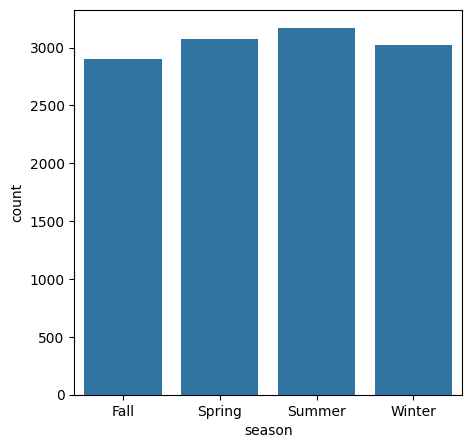

In [42]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(data = df, x = 'season', ax = ax)
ax.set_xlabel('season')
plt.show()

Dari visualisasi di atas, keempat musim hampir sama rata-ratanya untuk jumlah transaksi penyewaan sepeda.

**Distribusi total penyewa per jam yang dirincikan juga berdasarkan penyewa casual dan registered**

In [43]:
df.groupby(by = 'hr').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
hr,,,
17,38250,196611,234861
18,30347,183121,213468
8,11431,177145,188576
16,37570,119656,157226
19,25192,131539,156731
13,37644,94034,131678
12,35228,93650,128878
15,37076,89078,126154
14,38825,84384,123209


Berdasarkan tabel pivot di atas, dapat disimpulkan bahwa total penyewa sepeda paling banyak terjadi di jam 5 sore, sedangkan total penyewa sepeda paling sedikit terjadi di jam 4 pagi.

**Distribusi total penyewa saat hari libur atau tidak yang dirincikan juga berdasarkan penyewa casual dan registered**

In [44]:
df.groupby(by = 'holiday', observed = False).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
holiday,,,
No,419190,1826107,2245297
Yes,16736,40449,57185


Berdasarkan tabel pivot di atas, dapat disimpulkan bahwa total penyewa sepeda paling banyak terjadi saat bukan hari libur, sedangkan total penyewa sepeda paling sedikit terjadi saat hari libur.

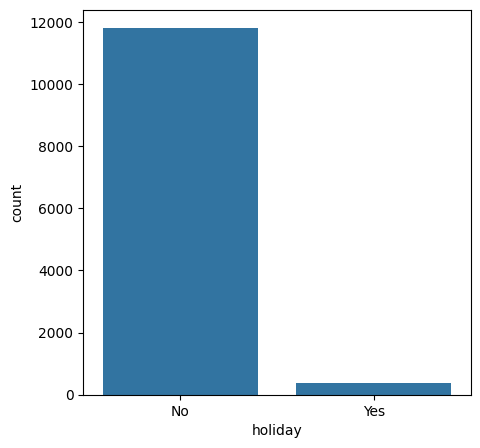

In [45]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(data = df, x = 'holiday', ax = ax)
ax.set_xlabel('holiday')
plt.show()

Dari visualisasi di atas, jumlah transaksi penyewaan sepeda paling banyak saat bukan hari libur.

**Distribusi total penyewa per kondisi cuaca yang dirincikan juga berdasarkan penyewa casual dan registered**

In [46]:
df.groupby(by = 'weathersit', observed = False).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).sort_values(by = 'cnt', ascending = False)

,casual,registered,cnt
weathersit,,,
Clear,328073,1327640,1655713
Mist/Cloudy,90720,442099,532819
Light Snow,17125,96602,113727
Heavy Rain,8,215,223


Berdasarkan tabel pivot di atas, dapat disimpulkan bahwa total penyewa sepeda paling banyak terjadi saat cuaca cerah, sedangkan total penyewa sepeda paling sedikit terjadi saat cuaca hujan deras.

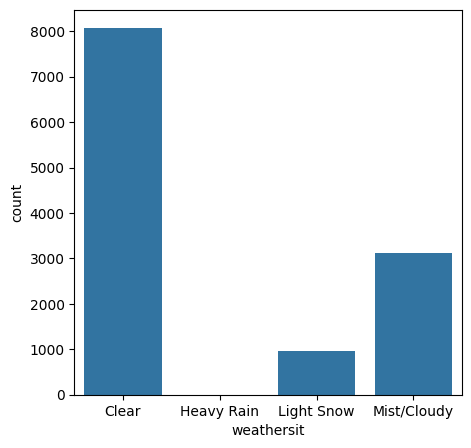

In [47]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(data = df, x = 'weathersit', ax = ax)
ax.set_xlabel('weathersit')
plt.show()

Dari visualisasi di atas, jumlah transaksi penyewaan sepeda paling banyak saat cuaca cerah.

**Menampilkan informasi minimum, maksimum, dan rata-rata temperatur dan kelembaban yang dikelompokkan berdasarkan musim**

In [48]:
df.groupby(by = 'season', observed = False).agg({
    'temp': ["min", "max", "mean"],
    "hum": ["min", "max", "mean"]
})

temp                   hum               
         min   max      mean   min  max      mean
season                                           
Fall    0.14  0.76  0.424174  0.16  1.0  0.663146
Spring  0.16  0.94  0.547807  0.16  1.0  0.627547
Summer  0.38  1.00  0.706336  0.16  1.0  0.632121
Winter  0.02  0.72  0.300496  0.00  1.0  0.580179

Berdasarkan tabel pivot di atas, dapat disimpulkan bahwa rata-rata temperatur tertinggi terjadi pada saat musim panas dan rata-rata kelembaban tertinggi terjadi pada saat musim gugur.

**Menampilkan grafik distribusi dari kolom numerikal**

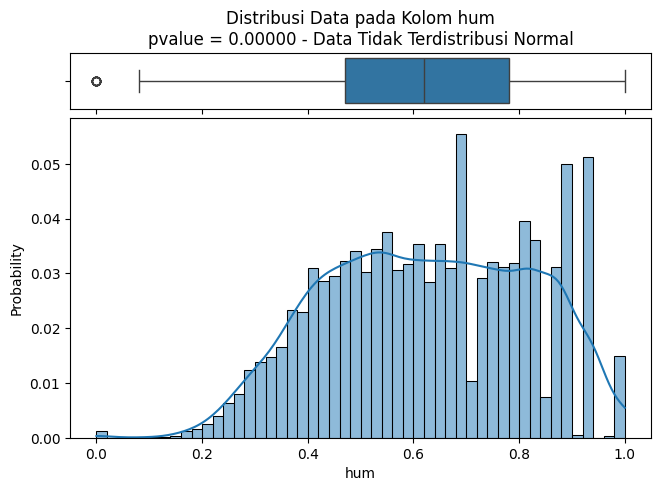

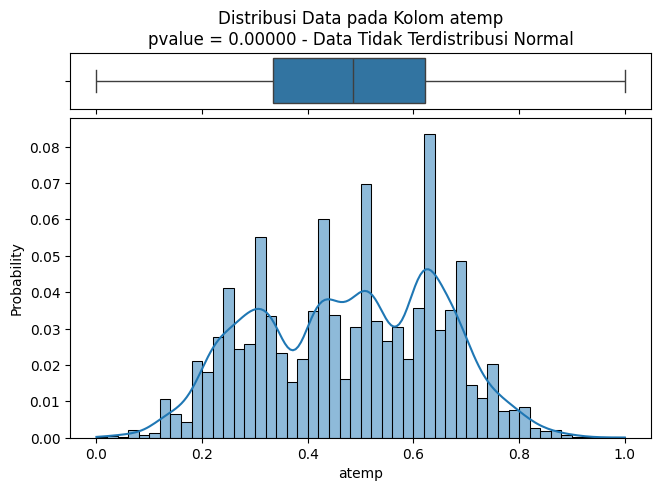

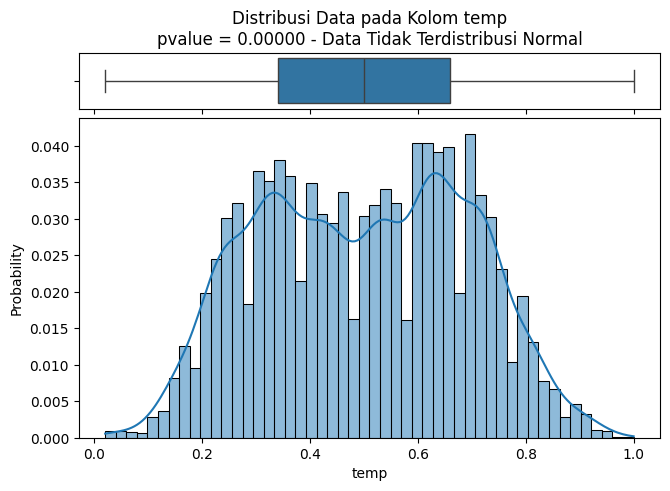

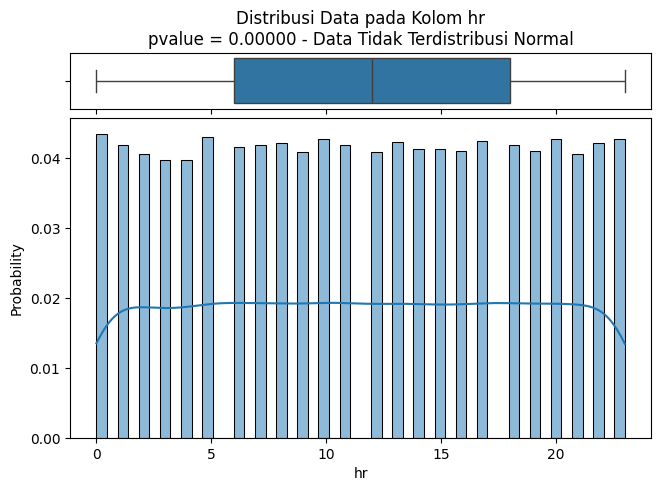

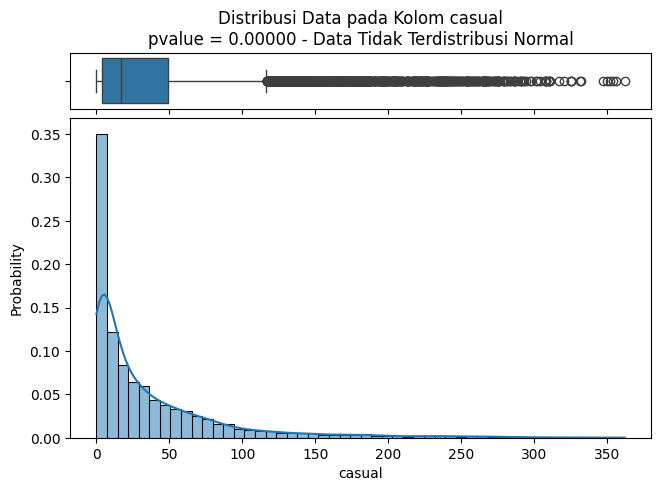

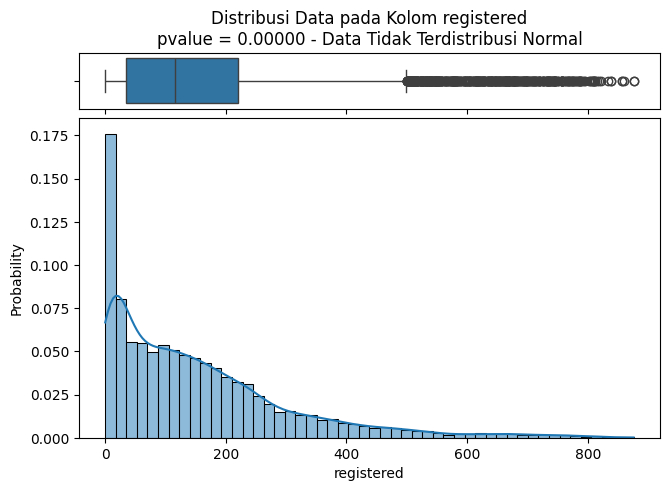

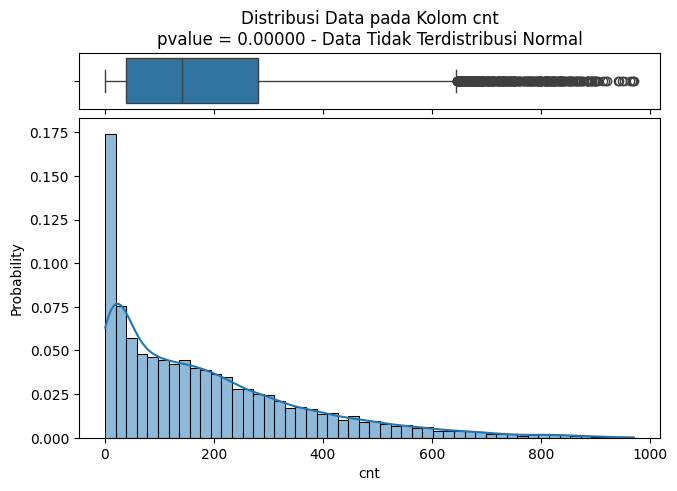

In [49]:
from scipy.stats import normaltest

kolom_numerik = df.drop(columns = ['dteday', 'weathersit', 'holiday', 'season']).describe().columns

for kolom in kolom_numerik:
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5, 5), gridspec_kw={'height_ratios': (.15, .85), 'hspace': 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05:
        distribusi = f'pvalue = {pvalue:.5f} - Data Terdistribusi Normal'
    else:
        distribusi = f'pvalue = {pvalue:.5f} - Data Tidak Terdistribusi Normal'

    ax1.set_title(f'Distribusi Data pada Kolom {kolom}\n{distribusi}', color = 'black')
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = '')
    sns.histplot(data = df[kolom], ax = ax2, stat = 'probability', kde = True, bins = 50)
    plt.show()

Dari grafik-grafik di atas terlihat bahwa semua kolom numerikal menunjukkan distribusi yang tidak normal, juga terdapat outlier pada beberapa kolom.

**Memisahkan data kolom 'dteday' menjadi hari ('weekday'), bulan ('mnth'), dan tahun ('yr') serta mengubahnya menjadi tipe kategorikal**

In [50]:
df['weekday'] = df['dteday'].dt.day_name()
df['mnth'] = df['dteday'].dt.month
df['yr'] = df['dteday'].dt.year

df['weekday'] = df['weekday'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['yr'] = df['yr'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  category      
 3   holiday     12165 non-null  category      
 4   season      12165 non-null  category      
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
 11  weekday     12165 non-null  category      
 12  mnth        12165 non-null  category      
 13  yr          12165 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(3), int64(4)
memory usage: 833.0 KB


**Menghapus kolom yang tidak diperlukan**

Kolom 'dteday' tidak diperlukan lagi karena nilai-nilai yang terdapat di dalamnya sudah diwakili dengan kolom 'weekday', 'mnth', dan 'yr'. Selain itu, kolom 'casual' dan 'registered' dapat dihapus karena sudah ditotalkan menjadi fitur target, yaitu 'cnt', dimana jika dipertahankan akan membuat model menjadi bias atau tidak sesuai. 

In [51]:
df.drop(columns = ['dteday', 'casual', 'registered'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12165 non-null  float64 
 1   weathersit  12165 non-null  category
 2   holiday     12165 non-null  category
 3   season      12165 non-null  category
 4   atemp       12165 non-null  float64 
 5   temp        12165 non-null  float64 
 6   hr          12165 non-null  int64   
 7   cnt         12165 non-null  int64   
 8   weekday     12165 non-null  category
 9   mnth        12165 non-null  category
 10  yr          12165 non-null  category
dtypes: category(6), float64(3), int64(2)
memory usage: 547.8 KB


**Menampilkan grafik jumlah transaksi penyewaan sepeda berdasarkan hari, bulan, dan jam**

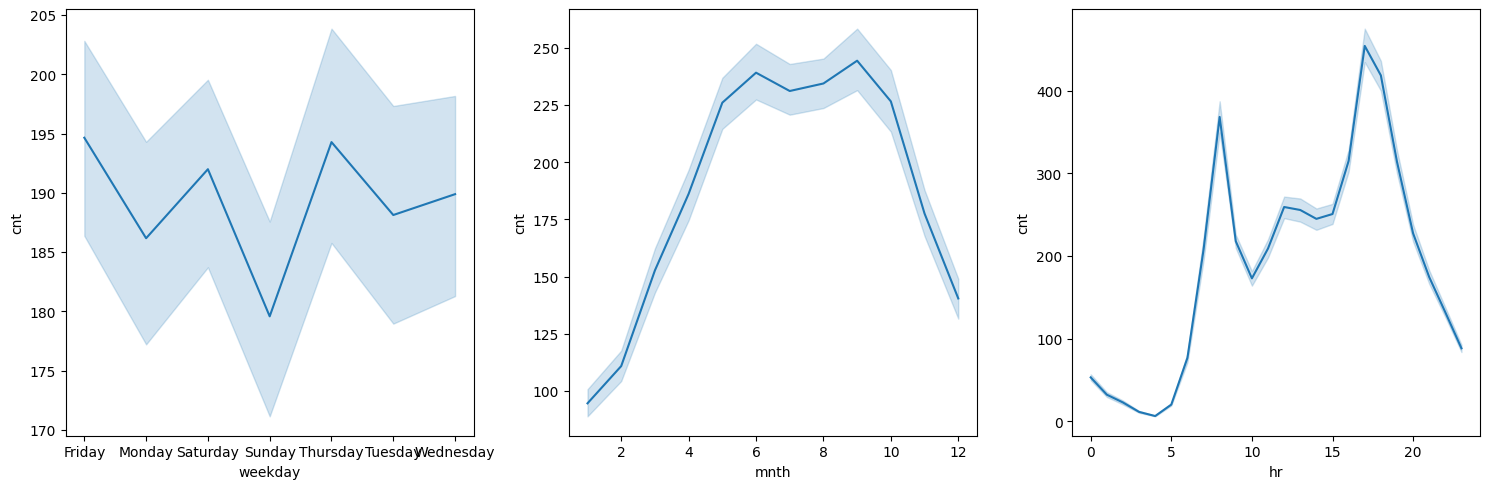

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.lineplot(data = df, x = 'weekday', y = 'cnt', ax = axes[0])
sns.lineplot(data = df, x = 'mnth', y = 'cnt', ax = axes[1])
sns.lineplot(data = df, x = 'hr', y = 'cnt', ax = axes[2])
axes[0].set_xlabel('weekday')
axes[1].set_xlabel('mnth')
axes[2].set_xlabel('hr')
plt.tight_layout()
plt.show()

Dari visualisasi di atas:
- Jika dilihat dari hari penyewaan sepeda, paling banyak terjadi di hari Kamis dan Jumat
- Jika dilihat dari bulan penyewaan sepeda, paling banyak terjadi di bulan Juni dan September
- Jika dilihat dari jam penyewaan sepeda, paling banyak terjadi pada jam 8, 17, dan 18

**Analisis lanjutan dengan menampilkan matriks korelasi untuk melihat hubungan di antara kolom yang terdapat di dalam DataFrame df**

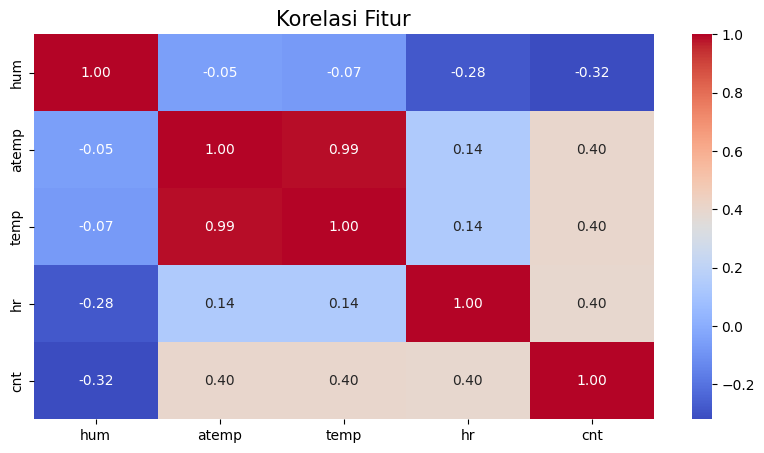

In [53]:
fig, ax = plt.subplots(figsize = (10, 5))

df_numeric = df.select_dtypes(include = [float, int])

sns.heatmap(
    data = df_numeric.corr(),
    cmap = 'coolwarm',
    annot = True,
    fmt = '.2f')

plt.title('Korelasi Fitur', fontsize = 15)
plt.show()

Berdasarkan visualisasi di atas dapat disimpulkan bahwa kolom 'atemp' dan 'temp' memiliki korelasi yang sangat tinggi, dimana keduanya menginformasikan temperatur per jam sehingga dapat digunakan salah satunya saja. Kolom 'temp' berisi nilai temperatur yang dibaca oleh termometer, sedangkan kolom 'atemp' berisi nilai temperatur yang memperhitungkan suhu udara, kelembaban, dan kecepatan angin. Dengan mempertimbangkan kelengkapan informasi, maka kolom 'temp' yang akan dihapus.

In [54]:
df = df.drop('temp', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12165 non-null  float64 
 1   weathersit  12165 non-null  category
 2   holiday     12165 non-null  category
 3   season      12165 non-null  category
 4   atemp       12165 non-null  float64 
 5   hr          12165 non-null  int64   
 6   cnt         12165 non-null  int64   
 7   weekday     12165 non-null  category
 8   mnth        12165 non-null  category
 9   yr          12165 non-null  category
dtypes: category(6), float64(2), int64(2)
memory usage: 452.8 KB


**Pengecekan outlier dengan menggunakan boxplot**

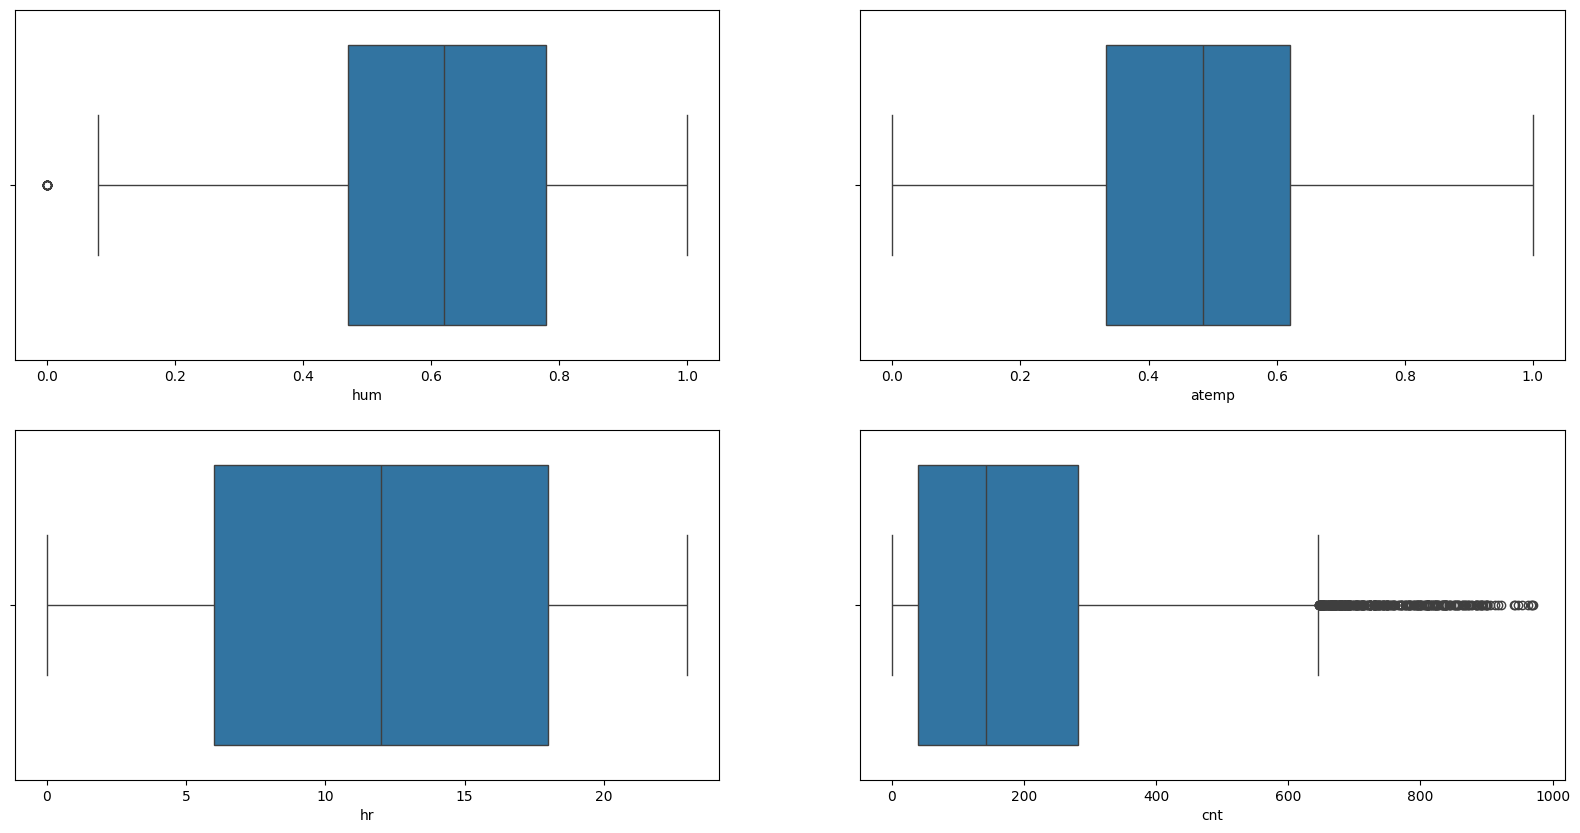

In [55]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
sns.boxplot(data = df, x = 'hum', ax = axes[0][0])
sns.boxplot(data = df, x = 'atemp', ax = axes[0][1])
sns.boxplot(data = df, x = 'hr', ax = axes[1][0])
sns.boxplot(data = df, x = 'cnt', ax = axes[1][1])
plt.show()

Berdasarkan visualisasi di atas dapat disimpulkan bahwa terdapat outlier pada kolom 'hum' dan 'cnt'. Kelembaban udara tidak mungkin bernilai 0, sehingga akan dihapus kolom 'hum' yang bernilai 0. Sedangkan outlier pada kolom 'cnt' bisa saja disebabkan karena adanya permintaan yang sangat tinggi pada waktu tertentu, sehingga nilai outlier-nya tidak akan dihapus.

In [56]:
df = df[df['hum'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12151 non-null  float64 
 1   weathersit  12151 non-null  category
 2   holiday     12151 non-null  category
 3   season      12151 non-null  category
 4   atemp       12151 non-null  float64 
 5   hr          12151 non-null  int64   
 6   cnt         12151 non-null  int64   
 7   weekday     12151 non-null  category
 8   mnth        12151 non-null  category
 9   yr          12151 non-null  category
dtypes: category(6), float64(2), int64(2)
memory usage: 547.1 KB


### **Modeling**

**Impor library untuk modeling**

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Ubah kolom kategorikal menjadi numerikal**

In [58]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop = 'first'), ['weathersit', 'holiday', 'season', 'weekday', 'yr'])
], remainder = 'passthrough')

**Memisahkan independen variabel dengan target**

In [59]:
X = df.drop(['cnt'], axis = 1)
y = df['cnt']

**Men-split data menjadi training dan testing dengan pembagian 80:20**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Memilih model benchmark**

In [61]:
# Mendefinisikan algoritme yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state = 0)
rf = RandomForestRegressor(random_state = 0)
xgb = XGBRegressor(random_state = 0)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func = np.log, inverse_func = np.exp)
log_knn = TransformedTargetRegressor(knn, func = np.log, inverse_func = np.exp)
log_dt = TransformedTargetRegressor(dt, func = np.log, inverse_func = np.exp)
log_rf = TransformedTargetRegressor(rf, func = np.log, inverse_func = np.exp)
log_xgb = TransformedTargetRegressor(xgb, func = np.log, inverse_func = np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritme
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritme terbaik berdasarkan tiap metrik
for i in models:
    crossval = KFold(n_splits = 5, shuffle = True, random_state = 19)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_root_mean_squared_error', 
        error_score = 'raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_error', 
        error_score = 'raise'
    )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv = crossval, 
        scoring = 'neg_mean_absolute_percentage_error', 
        error_score = 'raise'
    )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-169.57288644 -165.88074965 -166.27776393 -159.26146598 -159.21987836] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-111.61854665 -107.84419567 -108.83572482 -105.3179493  -106.06955204] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.39647684 -1.29294773 -1.44383981 -1.4402324  -1.38788634] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-125.29220726 -122.26786722 -127.15835551 -118.67385053 -113.22119411] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-76.94039612 -75.88534324 -77.82700469 -73.81805327 -71.06810375] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [62]:
# Evaluasi hasil dari 5 kandidat algoritme yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
}).sort_values('Mean_MAPE', ascending = False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
4,XGBoost Regressor,-45.334218,1.672440,-27.643440,0.792663,-0.258981,0.008295
3,RandomForest Regressor,-49.625035,2.090557,-30.460813,0.551098,-0.309644,0.011406
2,DecisionTree Regressor,-68.161074,2.443983,-40.146218,0.799640,-0.429542,0.014253
1,KNN Regressor,-121.322695,4.967011,-75.107780,2.422381,-1.137885,0.071908
0,Linear Regression,-164.042549,4.124966,-107.937194,2.223371,-1.392277,0.054519


Berdasarkan nilai RMSE, MAE, dan MAPE, 2 benchmark model terbaik adalah XGBoost dan RandomForest. Oleh karena itu, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik tersebut.

**Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest**

In [63]:
# Benchmark 2 model terbaik
models = {
    'XGB': log_xgb,
    'RandomForest': log_rf
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:
    model = Pipeline([
                ('preprocessing', transformer),
                ('scaler', scaler),
                ('model', models[i])
            ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index = models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,43.011719,26.201551,0.255174
RandomForest,45.330860,28.104559,0.289601


Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang lebih rendah dari RandomForest.

**Hyperparameter tuning**

Karena model XGBoost memiliki performa yang lebih baik dari RandomForest, maka selanjutnya akan digunakan model XGBoost sebagai model akhir. Pada tahap ini, akan dilakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [64]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100) / 100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10) / 10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10) / 10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 3, 7)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparameter space XGBoost
hyperparam_space_xgb = {
    'model__regressor__max_depth': max_depth, 
    'model__regressor__learning_rate': learning_rate,
    'model__regressor__n_estimators': n_estimators,
    'model__regressor__subsample': subsample,
    'model__regressor__gamma': gamma,
    'model__regressor__colsample_bytree': colsample_bytree,
    'model__regressor__reg_alpha': reg_alpha
}

In [65]:
# Benchmark model dengan hyperparameter tuning
xgb = log_xgb

# Membuat algorithm chains
estimator_xgb = Pipeline([
                    ('preprocessing', transformer),
                    ('scaler', scaler),
                    ('model', xgb)
                ])

crossval = KFold(n_splits = 5, shuffle = True, random_state = 0)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
                estimator_xgb, 
                param_distributions = hyperparam_space_xgb,
                n_iter = 1000,
                cv = crossval, 
                scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
                n_jobs = -1,
                refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metrik untuk optimisasi
                random_state = 0  
            )

In [66]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

c:\Users\Hp\anaconda3\envs\main-ds\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weathersit',
                                                                                'holiday',
                                                                                'season',
                                                                                'weekday',
                                                                                'yr'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_...
                                                                           115,
                                                                           116,
                                                                           117,
                                                                           118,
                                                                           119,
                                                                           120,
                                                                           121,
                                                                           122,
                                                                           123,
                                                                           124,
                                                                           125,
                                                                           126,
                                                                           127,
                                                                           128,
                                                                           129, ...],
                                        'model__regressor__reg_alpha': [0.001,
                                                                        0.01,
                                                                        0.1,
                                                                        1.0,
                                                                        10.0,
                                                                        100.0,
                                                                        1000.0],
                                        'model__regressor__subsample': [0.2,
                                                                        0.3,
                                                                        0.4,
                                                                        0.5,
                                                                        0.6,
                                                                        0.7,
                                                                        0.8,
                                                                        0.9]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [67]:
# Melihat hasil tuning dalam bentuk DataFrame, diurutkan berdasarkan RMSE, MAE, dan MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error',
                                                     'rank_test_neg_mean_absolute_error',
                                                     'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__reg_alpha,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
380,0.559149,0.012211,0.040586,0.005216,0.8,0.001,188,10,0.24,1,...,1.517605,1,-0.298557,-0.297415,-0.308222,-0.301118,-0.300073,-0.301077,0.003790,1
758,0.441589,0.010933,0.030842,0.002384,0.7,0.010,151,3,0.59,1,...,2.168342,2,-0.321190,-0.303566,-0.341117,-0.314843,-0.316765,-0.319496,0.012274,5
152,0.283850,0.016023,0.019896,0.001993,0.5,0.001,150,7,0.43,1,...,1.652685,4,-0.313081,-0.314996,-0.335299,-0.303739,-0.319462,-0.317316,0.010350,3
799,0.728192,0.022953,0.047965,0.003412,0.8,0.010,172,10,0.09,1,...,1.352355,3,-0.312539,-0.306919,-0.329608,-0.317268,-0.318113,-0.316889,0.007506,2
135,0.334606,0.035560,0.022154,0.003632,0.9,1.000,200,6,0.42,1,...,1.668045,5,-0.321803,-0.311691,-0.327193,-0.312022,-0.336154,-0.321773,0.009305,6


In [68]:
# Cek skor dan parameter terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -54.60722675596222
Best_params: {'model__regressor__subsample': 0.8, 'model__regressor__reg_alpha': 0.001, 'model__regressor__n_estimators': 188, 'model__regressor__max_depth': 10, 'model__regressor__learning_rate': 0.24, 'model__regressor__gamma': 1, 'model__regressor__colsample_bytree': 0.9}


**Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih**

In [69]:
# Model XGBoost
model = {'XGB': log_xgb}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrik RMSE, MAE, dan MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index = model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,50.218468,31.625689,0.288068


**Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning**

In [70]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,43.011719,26.201551,0.255174


In [71]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,50.218468,31.625689,0.288068


Dari hasil pemodelan diketahui bahwa:
- RMSE, MAE, dan MAPE sebelum tuning: 43.012, 26.202, 25.517%
- RMSE, MAE, dan MAPE setelah tuning: 50.218, 31.626, 28.807%

Artinya setelah di-tuning, performa mesin menurun. Hal ini diduga bisa saja belum berhasil menemukan parameter terbaik dan pada model ini hanya melakukan 1000 model yang dicoba dengan menggunakan random search. Oleh karena ini, dilakukan lagi tuning kedua dengan mengubah dan mempersempit parameternya.

**Hyperparameter tuning (kedua)**

In [72]:
# Kedalaman pohon
max_depth_2 = list(np.arange(6, 11))

# Learning rate
learning_rate_2 = list(np.arange(9, 42) / 100)

# Jumlah pohon
n_estimators_2 = list(np.arange(149, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample_2 = list(np.arange(6, 9) / 10)

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree_2 = list(np.arange(4, 10) / 10)

# Alpha (regularization)
reg_alpha_2 = list(np.logspace(-1, 1, 3)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparameter space XGBoost
hyperparam_space_xgb_2 = {
    'model__regressor__max_depth': max_depth_2, 
    'model__regressor__learning_rate': learning_rate_2,
    'model__regressor__n_estimators': n_estimators_2,
    'model__regressor__subsample': subsample_2,
    'model__regressor__colsample_bytree': colsample_bytree_2,
    'model__regressor__reg_alpha': reg_alpha_2
}

In [73]:
# Benchmark model dengan hyperparameter tuning
xgb_2 = log_xgb

# Membuat algorithm chains
estimator_xgb_2 = Pipeline([
                    ('preprocessing', transformer),
                    ('scaler', scaler),
                    ('model', xgb_2)
                ])

crossval_2 = KFold(n_splits = 5, shuffle = True, random_state = 0)

# Hyperparameter tuning
random_xgb_2 = RandomizedSearchCV(
                    estimator_xgb_2, 
                    param_distributions = hyperparam_space_xgb_2,
                    n_iter = 500,
                    cv = crossval_2, 
                    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
                    n_jobs = -1,
                    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
                    random_state = 0  
                )

In [74]:
# Fitting data training untuk mencari parameter terbaik
random_xgb_2.fit(X_train, y_train)

c:\Users\Hp\anaconda3\envs\main-ds\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['weathersit',
                                                                                'holiday',
                                                                                'season',
                                                                                'weekday',
                                                                                'yr'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              TransformedTargetRegressor(func=<ufunc 'log'>,
                                                                         inverse_...
                                                                           153,
                                                                           154,
                                                                           155,
                                                                           156,
                                                                           157,
                                                                           158,
                                                                           159,
                                                                           160,
                                                                           161,
                                                                           162,
                                                                           163,
                                                                           164,
                                                                           165,
                                                                           166,
                                                                           167,
                                                                           168,
                                                                           169,
                                                                           170,
                                                                           171,
                                                                           172,
                                                                           173,
                                                                           174,
                                                                           175,
                                                                           176,
                                                                           177,
                                                                           178, ...],
                                        'model__regressor__reg_alpha': [0.1,
                                                                        1.0,
                                                                        10.0],
                                        'model__regressor__subsample': [0.6,
                                                                        0.7,
                                                                        0.8]},
                   random_state=0, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_er

In [75]:
# Melihat hasil tuning dalam bentuk DataFrame, diurutkan berdasarkan RMSE, MAE, dan MAPE
pd.DataFrame(random_xgb_2.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__regressor__subsample,param_model__regressor__reg_alpha,param_model__regressor__n_estimators,param_model__regressor__max_depth,param_model__regressor__learning_rate,param_model__regressor__colsample_bytree,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
127,0.789074,0.037962,0.037252,0.003813,0.8,1.0,195,8,0.09,0.9,...,0.991666,2,-0.253172,-0.247629,-0.257921,-0.249370,-0.253472,-0.252313,0.003582,10
42,1.276804,0.020340,0.057069,0.002638,0.8,0.1,196,7,0.12,0.9,...,0.846785,1,-0.251064,-0.246029,-0.258139,-0.250770,-0.250799,-0.251360,0.003876,5
135,0.605860,0.030898,0.028451,0.002634,0.8,0.1,185,7,0.15,0.8,...,1.020328,3,-0.253393,-0.244809,-0.254740,-0.247778,-0.255596,-0.251263,0.004224,4
394,0.829628,0.034876,0.043224,0.004115,0.8,0.1,188,7,0.11,0.8,...,1.238164,6,-0.250716,-0.243149,-0.256499,-0.249269,-0.251391,-0.250205,0.004288,1
415,0.748437,0.007100,0.042222,0.004748,0.8,1.0,171,7,0.10,0.8,...,1.396709,15,-0.254160,-0.243725,-0.262270,-0.250975,-0.252112,-0.252649,0.005959,13


In [76]:
# Cek skor dan parameter terbaik
print('XGBoost')
print('Best_score:', random_xgb_2.best_score_)
print('Best_params:', random_xgb_2.best_params_)

XGBoost
Best_score: -43.078856499286154
Best_params: {'model__regressor__subsample': 0.8, 'model__regressor__reg_alpha': 1.0, 'model__regressor__n_estimators': 195, 'model__regressor__max_depth': 8, 'model__regressor__learning_rate': 0.09, 'model__regressor__colsample_bytree': 0.9}


**Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih**

In [77]:
# Model XGBoost
model_2 = {'XGB' : log_xgb}

# Define model terhadap estimator terbaik
xgb_tuning_2 = random_xgb_2.best_estimator_

# Fitting model
xgb_tuning_2.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning_2 = xgb_tuning_2.predict(X_test)

# Simpan nilai metrik RMSE, MAE, dan MAPE setelah tuning
rmse_xgb_tuning_2 = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning_2))
mae_xgb_tuning_2 = mean_absolute_error(y_test, y_pred_xgb_tuning_2)
mape_xgb_tuning_2 = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_2)

score_after_tuning_2 = pd.DataFrame({'RMSE': rmse_xgb_tuning_2, 'MAE': mae_xgb_tuning_2, 'MAPE': mape_xgb_tuning_2}, index = model.keys())
score_after_tuning_2

,RMSE,MAE,MAPE
XGB,40.059972,24.44116,0.248068


**Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning**

In [78]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,43.011719,26.201551,0.255174


In [79]:
# Setelah hyperparameter tuning
score_after_tuning_2

,RMSE,MAE,MAPE
XGB,40.059972,24.44116,0.248068


Dari hasil pemodelan diketahui bahwa:
- RMSE, MAE, dan MAPE sebelum tuning: 43.012, 26.202, 25.517%
- RMSE, MAE, dan MAPE setelah tuning: 50.218, 31.626, 28.807% (tuning 1)
- RMSE, MAE, dan MAPE setelah tuning: 40.060, 24.441, 24.807% (tuning 2)

Artinya setelah tuning kedua, performa mesin meningkat dibandingkan tuning pertama.

**Visualisasi dan analisis nilai aktual dan nilai prediksi**

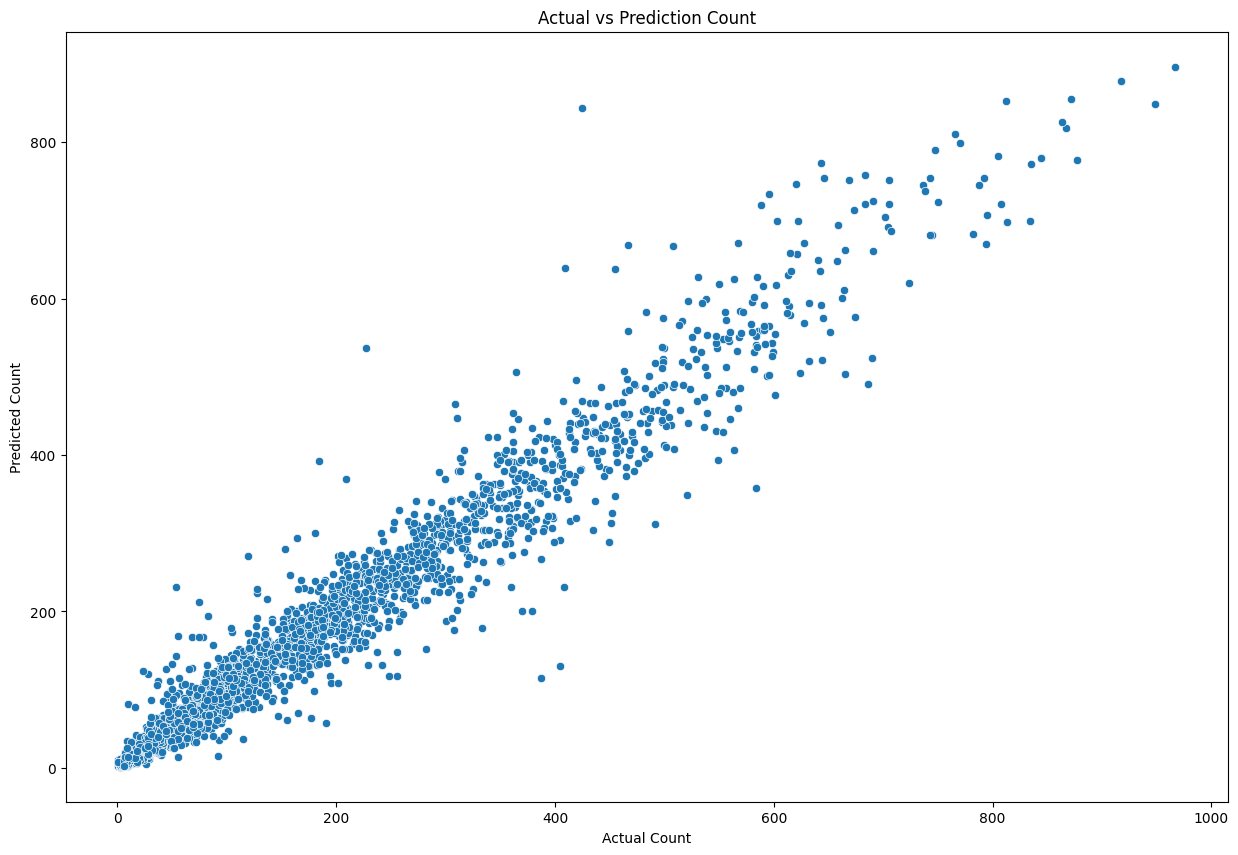

In [82]:
plt.figure(figsize = (15, 10))
plot = sns.scatterplot(x = y_test, y = y_pred_xgb_tuning_2).set(title = 'Actual vs Prediction Count', xlabel = 'Actual Count', ylabel = 'Predicted Count');

Dari visualisasi tersebut terlihat bahwa model cukup bisa bekerja secara efektif, namun masih terdapat beberapa hasil prediksi yang sedikit menyimpang, baik lebih tinggi (overestimation) atau lebih rendah (underestimation). Akan tetapi, dari nilai MAPE yang didapatkan, yaitu sekitar 25% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting'.

**Pengecekan dengan menggunakan fungsi feature_importances_ untuk mengetahui fitur apa saja yang sangat memengaruhi target ('cnt')**

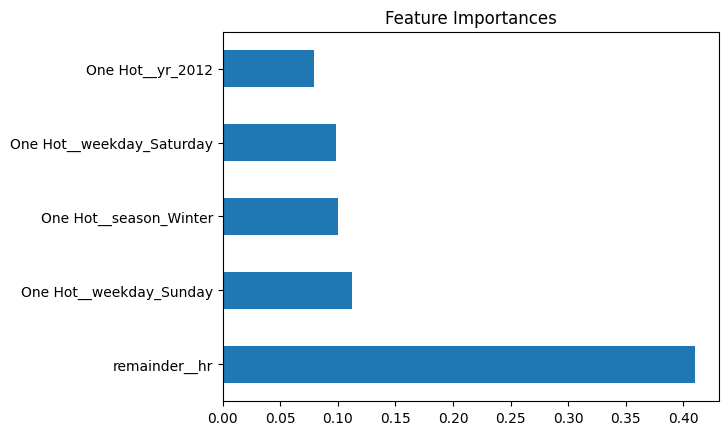

In [84]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning_2['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind = 'barh', title = 'Feature Importances')
plt.show()

Dari visualisasi di atas terlihat bahwa 5 fitur yang paling penting pada pemodelan ini adalah 'hr', 'weekday_Sunday', 'season_Winter', 'weekday_Saturday', dan 'yr_2012'. Namun, fitur 'hr' sangat memengaruhi target ('cnt') karena memiliki nilai Feature Importances yang jauh lebih tinggi dibandingkan fitur-fitur lainnya.

### **Conclusion**

- Berdasarkan pemodelan yang sudah dilakukan, fitur 'hr' menjadi fitur yang paling berpengaruh terhadap 'cnt' (target).
- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, dan MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~25%, maka dapat disimpulkan bahwa bila nanti model yang dibuat ini digunakan untuk memperkirakan jumlah sepeda yang didistribusikan pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan jumlah unit rata-ratanya akan meleset kurang lebih sebesar 25% dari jumlah unit seharusnya.
- Hyperpamater tuning kedua membuat performa model meningkat dengan nilai sebagai berikut.
    * RMSE, MAE, dan MAPE sebelum tuning: 43.012, 26.202, 25.517%
    * RMSE, MAE, dan MAPE setelah tuning: 50.218, 31.626, 28.807% (tuning 1)
    * RMSE, MAE, dan MAPE setelah tuning: 40.060, 24.441, 24.807% (tuning 2)

### **Recommendations**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi yaitu:
- Penambahan dataset, dimana dataset yang digunakan saat ini hanya dari tahun 2011 s.d. 2012. Dengan menambah dataset pada periode tertentu, mesin dapat mempelajari pola-pola tambahan agar bisa memprediksi lebih akurat.
- Melakukan eksplorasi lebih dalam terhadap fitur-fitur yang relevan untuk membantu dalam meningkatkan performa model, seperti menambah kolom yang mempunyai korelasi terhadap target ('cnt’), misalnya wilayah, stasiun, lama waktu penyewaan, titik awal penyewaan, titik akhir pengembalian, dan sebagainya.
- Mempertimbangkan model yang lebih kompleks yang dapat membantu dalam meningkatkan akurasi, seperti neural network ataupun deep learning.
- Menggabungkan prediksi dari beberapa model yang berbeda (stacking atau ensemble) sehingga dapat meningkatkan akurasi.
- Jika permintaan penyewaan sepeda menunjukkan pola musiman (seasonality) atau tren tertentu, bisa dipertimbangkan untuk menggunakan metode pemodelan time series seperti ARIMA.

****

#### **Save Model**

In [85]:
# Save model
import pickle

model = random_xgb_2.best_estimator_
model.fit(X, y)

pickle.dump(model, open('model_bike_sharing.sav', 'wb'))

In [86]:
# Load model
filename = 'model_bike_sharing.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

29.186079455449864